# HW_2

In [218]:
from pandas import read_html, to_numeric
from numpy import nan

In [219]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = read_html(url)

# Назва таблички не парситься, тому знайшов її номер 12
target_table = tables[12]

# Заміна значень "—" на NaN
target_table.replace("—", nan, inplace=True)

# Видалення останнього рядка таблиці
target_table = target_table.drop(target_table.index[-1])

# Заміна типів нечислових колонок на числові
for column in target_table.columns:
    if target_table[column].dtype == object:
        try:
            target_table[column] = to_numeric(target_table[column])
        except ValueError:
            pass

column_types = target_table.dtypes

# Заміна відсутніх даних середніми значеннями стовпців
target_table = target_table.fillna(target_table.mean(numeric_only=True))

print(target_table.head())

             Регіон   1950   1960   1970  1990  2000  2012    2014        2019
0              Крим  230.0  206.0  160.0   130    73   126  111.44   80.173913
1         Вінницька  224.0  192.0  142.0   124    84   112  109.00   76.000000
2         Волинська  247.0  250.0  179.0   153   112   148  141.00  101.000000
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.00   71.000000
4          Донецька  271.0  214.0  140.0   109    61    98   82.00   80.173913


In [220]:
rows, columns = target_table.shape

print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns}")

Кількість рядків: 27
Кількість стовпців: 9


In [221]:
column_types = target_table.dtypes

print("Типи стовпців:")
print(column_types)

Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [222]:
# Підрахунок частки пропусків, що міститься в кожній колонці
missing_values_ratio = (target_table.isnull().sum() / len(target_table)) * 100

print("Частка пропусків у кожній колонці:")
print(missing_values_ratio)

Частка пропусків у кожній колонці:
Регіон    0.0
1950      0.0
1960      0.0
1970      0.0
1990      0.0
2000      0.0
2012      0.0
2014      0.0
2019      0.0
dtype: float64


In [223]:
# список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
target_birth_rate = "2019"
birth_rate = target_table[target_birth_rate]
average_birth_rate = birth_rate.mean()
regions_above_average = target_table[target_table[target_birth_rate] > average_birth_rate]["Регіон"]

print(f"Регіони з рівнем народжуваності у {target_birth_rate} році вищим за середній по Україні:")
print(regions_above_average)

Регіони з рівнем народжуваності у 2019 році вищим за середній по Україні:
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [224]:
# Регіон з найвищою народжуваністю у 2014 році
target_birth_rate = "2014"
region_max_birth_rate = target_table.loc[target_table[target_birth_rate].idxmax()]["Регіон"]
max_birth_rate = target_table[target_birth_rate].max()

print(f"Найвища народжуваність у {target_birth_rate} році була в регіоні '{region_max_birth_rate}' з рівнем {max_birth_rate}")

Найвища народжуваність у 2014 році була в регіоні 'Рівненська' з рівнем 148.0


In [225]:
from matplotlib.pyplot import figure, bar, title, xlabel, ylabel, xticks, tight_layout, show, text, xlim, legend, grid, scatter
from seaborn import lineplot, kdeplot

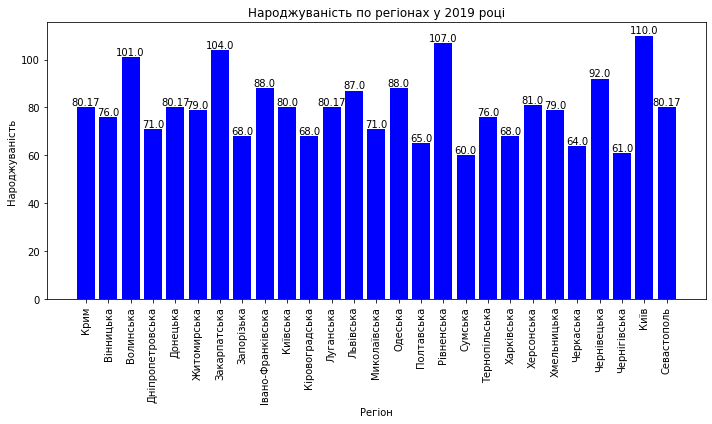

In [226]:
# Діаграма
target_birth_rate = "2019"
regions = target_table["Регіон"]
birth_rate = target_table[target_birth_rate]

figure(figsize=(10, 6))
bars = bar(regions, birth_rate, color='blue')

for bar in bars:
    height = bar.get_height()
    text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')


title(f'Народжуваність по регіонах у {target_birth_rate} році')

xlabel('Регіон')
xticks(rotation=90)

ylabel('Народжуваність')

tight_layout()
show()

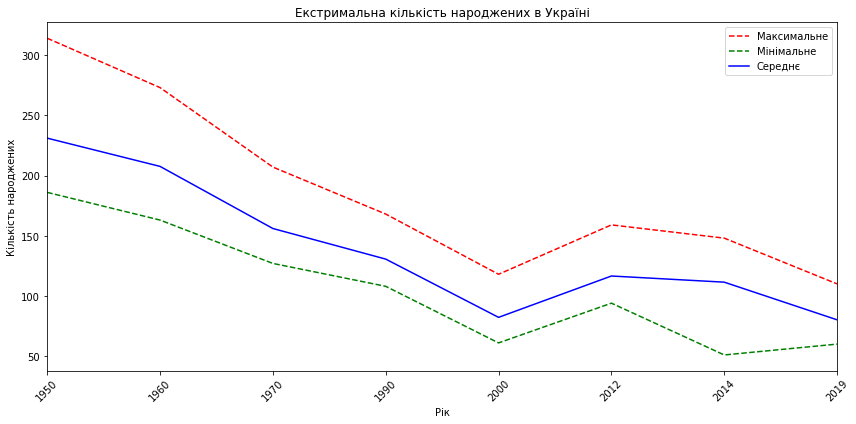

In [227]:
# Екстримальна кількість народжених в Україні
target_table_transposed = target_table.set_index('Регіон').T

max_values = target_table_transposed.max(axis=1)
min_values = target_table_transposed.min(axis=1)
mean_values = target_table_transposed.mean(axis=1)

figure(figsize=(12, 6))
lineplot(data=max_values, color='red', linestyle='--', label='Максимальне')
lineplot(data=min_values, color='green', linestyle='--', label='Мінімальне')
lineplot(data=mean_values, color='blue', linestyle='-', label='Середнє')

title('Екстримальна кількість народжених в Україні')
xlabel('Рік')
ylabel('Кількість народжених')
legend()
xlim(target_table_transposed.index.min(), target_table_transposed.index.max())
xticks(rotation=45)
tight_layout()
show()




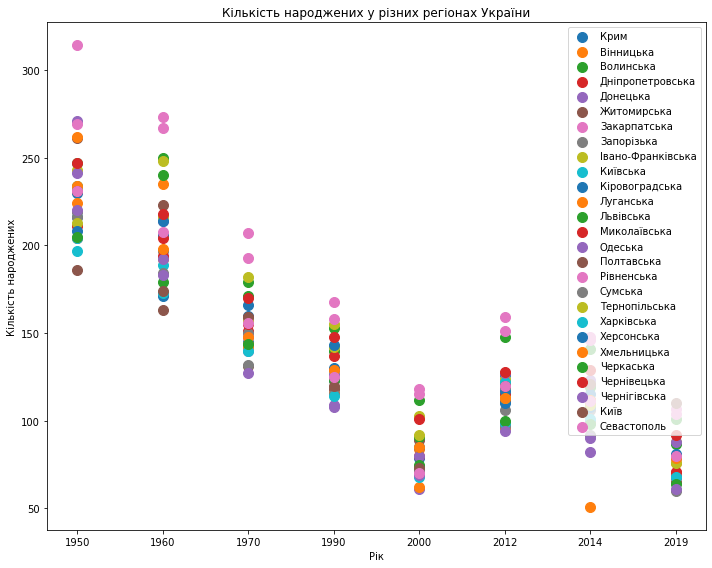

In [228]:
# Кількість народжених у різних регіонах України

data_for_plot = target_table.set_index('Регіон').T

figure(figsize=(10, 8))

for region in data_for_plot.columns:
    scatter(data_for_plot.index, data_for_plot[region], s=100, label=region)

title('Кількість народжених у різних регіонах України')
xlabel('Рік')
ylabel('Кількість народжених')

legend()

tight_layout()
show()



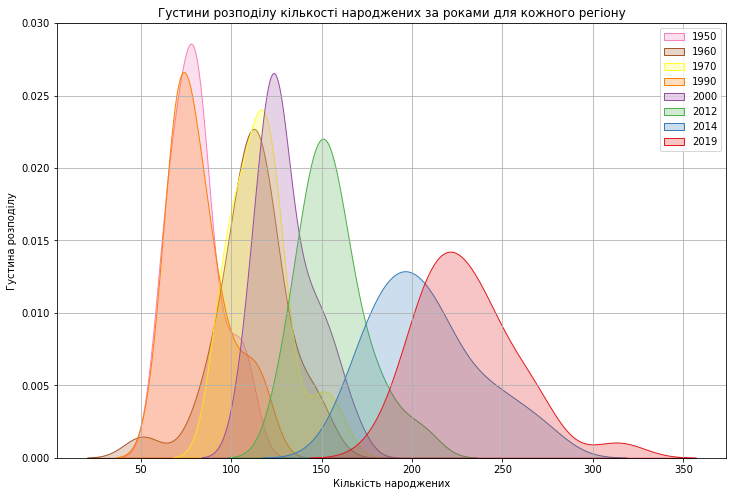

In [229]:
# Густини розподілу кількості народжених за роками для кожного регіону
target_table_no_region = target_table.drop(columns=['Регіон'])

figure(figsize=(12, 8))
kdeplot(data=target_table_no_region, fill=True, palette='Set1', common_norm=False)

title('Густини розподілу кількості народжених за роками для кожного регіону')
xlabel('Кількість народжених')
ylabel('Густина розподілу')
legend(target_table_no_region.columns)
grid(True)
show()